In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors

In [82]:
second = 261
print(f"{second//60} minutes {second%60} seconds")

4 minutes 21 seconds


In [80]:
minutes = 16
seconds = 00
print(f"{minutes*60+seconds} seconds")

960 seconds


In [2]:
!ls ../../../../../mnt/e/

'$RECYCLE.BIN'			       'System Volume Information'
 22_WOPAM_DAY			       'TARIFA 3 SYLENCE PAMGUARD'
 Autorun.inf			       'Tarifa 1 RESEA 260424 a 050524'
'Deep Learning Analysis'	       'Tarifa 2 RESEA 270524 a 040624'
 Definir_Fechahora_Deteccion.m	       'Tarifa 2 SYLENCE - AQUI'
 Desarrollo			       'Tarifa 2 SYLENCE - Split 5 min KK'
'Downsampled AQUI TAMBIÉN'	       'Tarifa 3 RESEA Junio'
'PAMGUARD RESULTADOS'		        Visualizardor_Detecciones.m
 SEANIMALMOVE_hydrophoneSYLENCE_rms.m  'WOPAM DAY'
'SPL_OTROSparametros_Tarifa_1&2.xlsx'   Warranty.pdf
 Seagate			        from_channelA_to_SM301165_0.m
 Start_Here_Chromebook.pdf	        q_SEANIMALMOVE_SYLENCE_hydrophone_rms.m
 Start_Here_Win.exe


In [3]:
import pandas as pd

# Load CSV predictions.csv
df = pd.read_csv('../../../../../mnt/e/22_WOPAM_DAY/predictions.csv')
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,0,3,Background,0.975984,"[0.9759836792945862, 0.0001606248551979661, 0...."
1,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,3,6,Background,0.987918,"[0.9879183173179626, 3.755193392862566e-05, 0...."
2,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,6,9,Background,0.971495,"[0.9714951515197754, 9.890559886116534e-05, 0...."
3,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,9,12,Background,0.961309,"[0.9613091945648193, 0.00022106198593974113, 0..."
4,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,12,15,Background,0.974709,"[0.9747094511985779, 5.3836880397284403e-05, 0..."
...,...,...,...,...,...,...,...
86321,../../../mnt/e/WOPAM DAY/channelA_2024-06-09_2...,channelA_2024-06-09_23-55-02_48kHz.wav,285,288,Background,0.967570,"[0.9675696492195129, 0.000210891681490466, 0.0..."
86322,../../../mnt/e/WOPAM DAY/channelA_2024-06-09_2...,channelA_2024-06-09_23-55-02_48kHz.wav,288,291,Background,0.935410,"[0.93541020154953, 0.0006943748448975384, 0.02..."
86323,../../../mnt/e/WOPAM DAY/channelA_2024-06-09_2...,channelA_2024-06-09_23-55-02_48kHz.wav,291,294,Background,0.976622,"[0.976621687412262, 8.697218436282128e-05, 0.0..."
86324,../../../mnt/e/WOPAM DAY/channelA_2024-06-09_2...,channelA_2024-06-09_23-55-02_48kHz.wav,294,297,Background,0.933704,"[0.9337034821510315, 0.0006229600985534489, 0...."


In [4]:
## Define class mapping
CLASSES_MAPPING = {
    'Background': 0,
    'BottlenoseDolphin': 1,
    'CommonDolphin': 2,
    'Fin_FinbackWhale': 3,
    "Grampus_Risso'sDolphin": 4,
    'HarborPorpoise': 5,
    'HumpbackWhale': 6,
    'KillerWhale': 7,
    'Long_FinnedPilotWhale': 8,
    'MinkeWhale': 9,
    'SpermWhale': 10,
    'StripedDolphin': 11
}

CLASSES_MAPPING = {
    'Background': 0,
    'BottlenoseDolphin': 1,
    'CommonDolphin': 2,
    "Grampus_Risso'sDolphin": 3,
    'HarborPorpoise': 4,
    'KillerWhale': 5,
    'Long_FinnedPilotWhale': 6,
    'StripedDolphin': 7
}

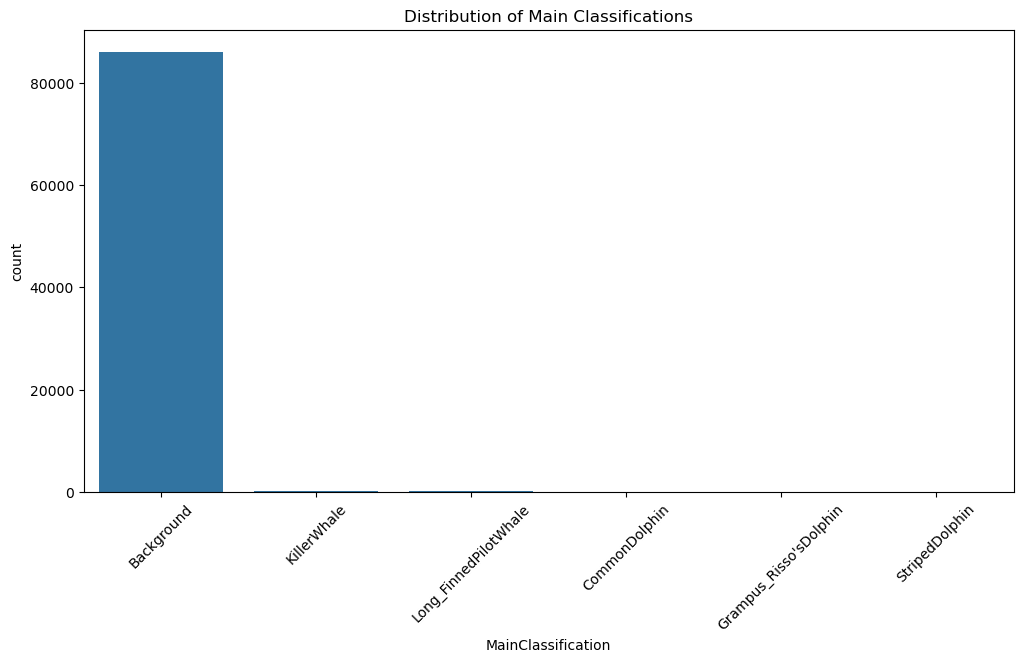

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of main classifications
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MainClassification', order=df['MainClassification'].value_counts().index)
plt.title('Distribution of Main Classifications')
plt.xticks(rotation=45)
plt.show()

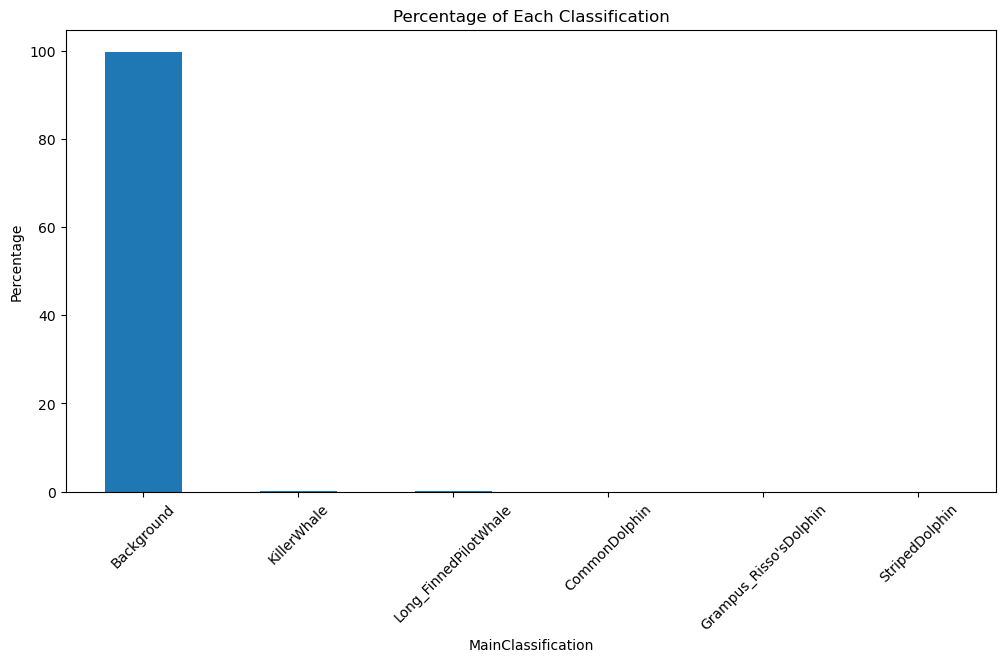

In [6]:
# Calculate the percentage of each classification
classification_counts = df['MainClassification'].value_counts(normalize=True) * 100

# Plot the percentage of each classification
plt.figure(figsize=(12, 6))
classification_counts.plot(kind='bar')
plt.title('Percentage of Each Classification')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

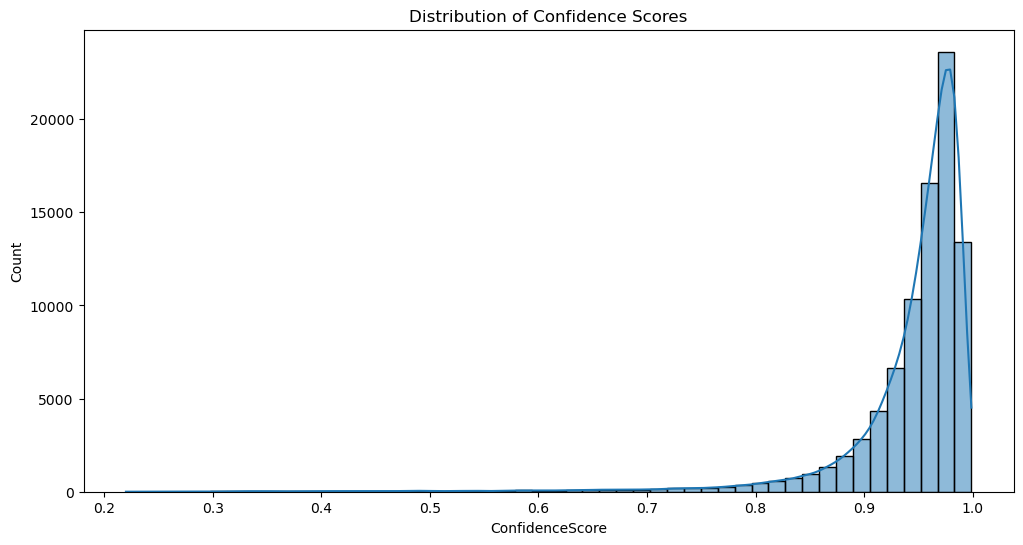

In [7]:
# Plot the distribution of confidence scores
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='ConfidenceScore', bins=50, kde=True)
plt.title('Distribution of Confidence Scores')
plt.show()

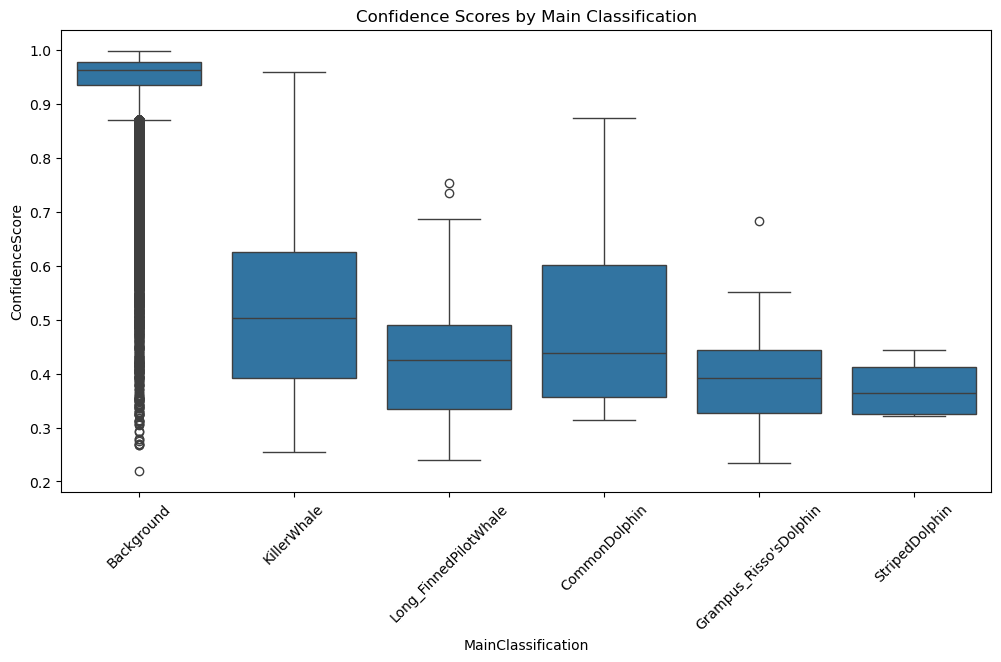

In [8]:
# Plot the confidence scores by main classification
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MainClassification', y='ConfidenceScore', order=df['MainClassification'].value_counts().index)
plt.title('Confidence Scores by Main Classification')
plt.xticks(rotation=45)
plt.show()

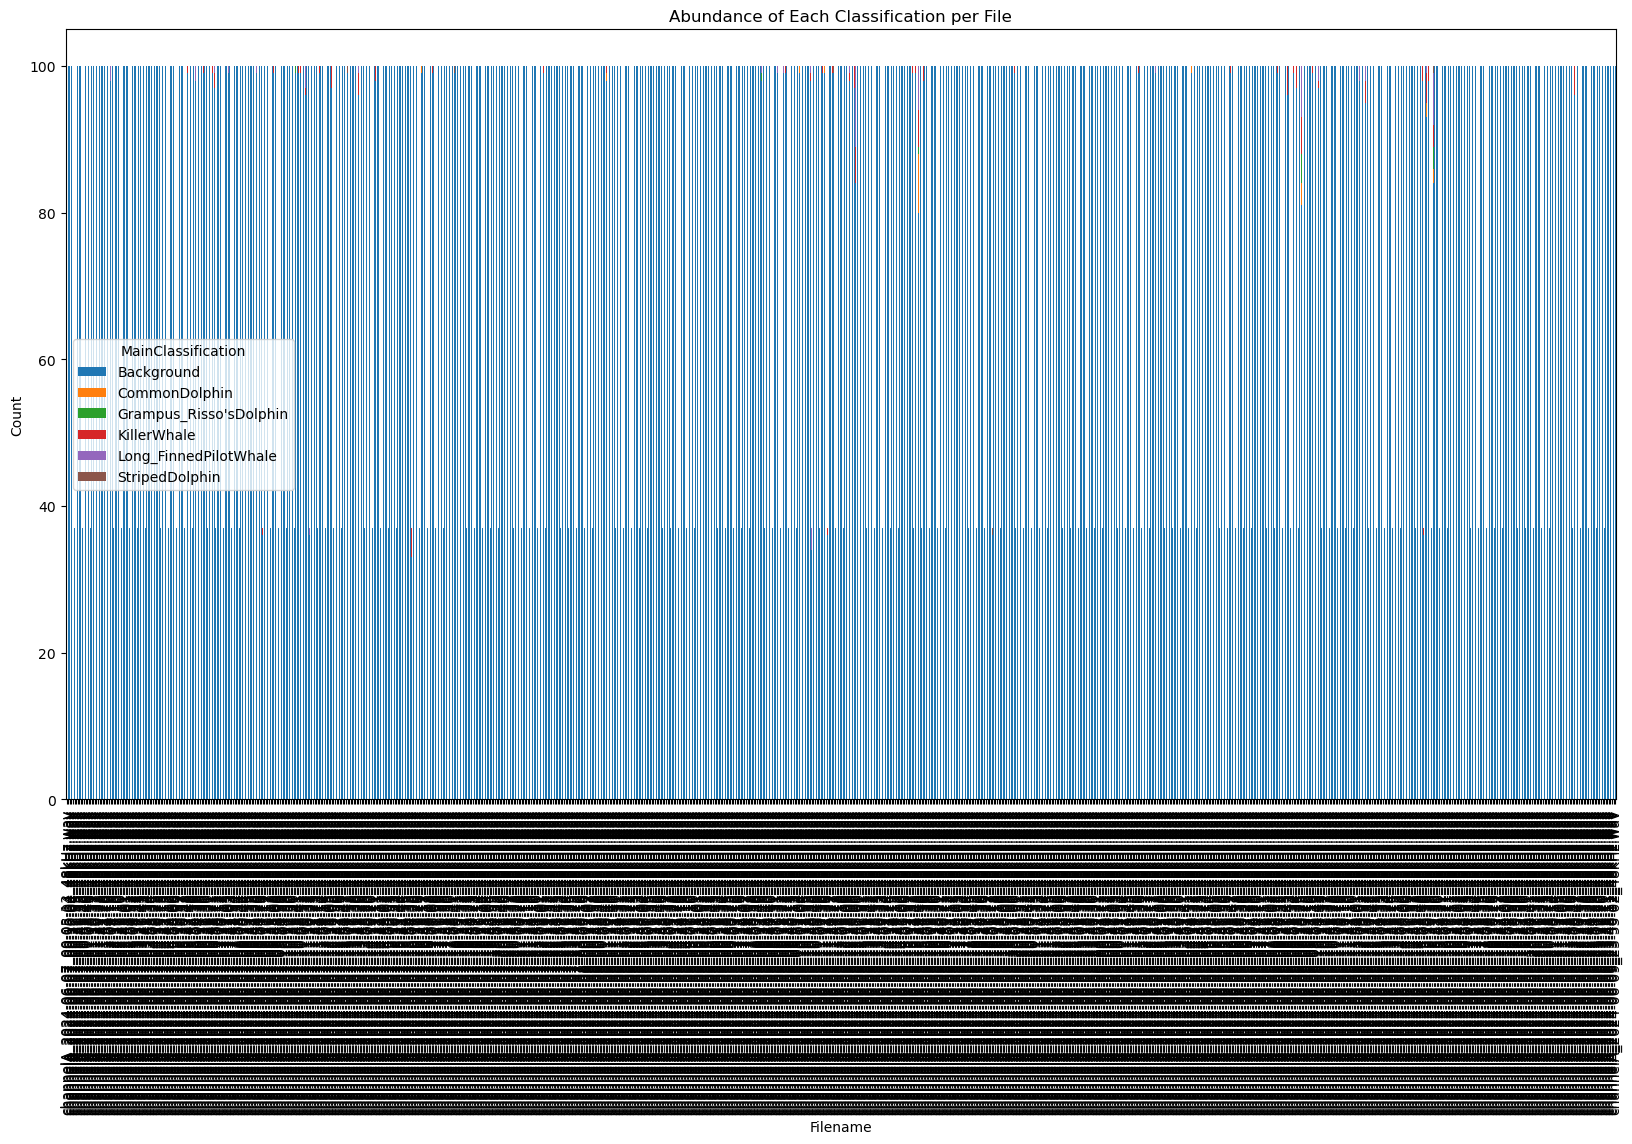

In [9]:
# Calculate the abundance of each classification per file
abundance_per_file = df.groupby(['Filename', 'MainClassification']).size().unstack(fill_value=0)

# Plot the abundance of each classification per file
abundance_per_file.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Abundance of Each Classification per File')
plt.ylabel('Count')
plt.xticks()
plt.show()

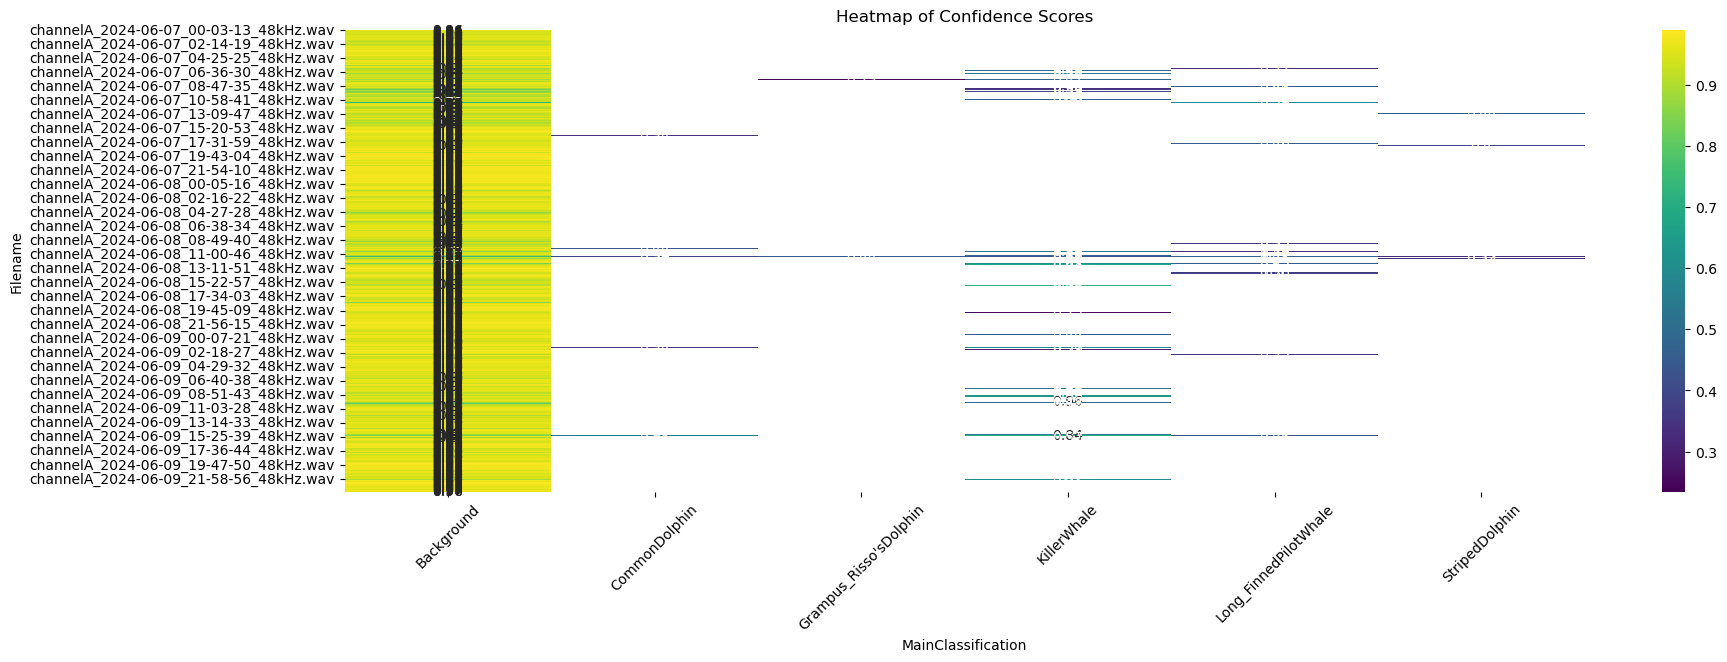

In [10]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Filename', columns='MainClassification', values='ConfidenceScore', aggfunc='mean')

# Plot the heatmap of confidence scores
plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Heatmap of Confidence Scores')
plt.xticks(rotation=45)
plt.show()

In [11]:
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,0,3,Background,0.975984,"[0.9759836792945862, 0.0001606248551979661, 0...."
1,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,3,6,Background,0.987918,"[0.9879183173179626, 3.755193392862566e-05, 0...."
2,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,6,9,Background,0.971495,"[0.9714951515197754, 9.890559886116534e-05, 0...."
3,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,9,12,Background,0.961309,"[0.9613091945648193, 0.00022106198593974113, 0..."
4,../../../mnt/e/WOPAM DAY/channelA_2024-06-07_0...,channelA_2024-06-07_00-03-13_48kHz.wav,12,15,Background,0.974709,"[0.9747094511985779, 5.3836880397284403e-05, 0..."
...,...,...,...,...,...,...,...
86321,../../../mnt/e/WOPAM DAY/channelA_2024-06-09_2...,channelA_2024-06-09_23-55-02_48kHz.wav,285,288,Background,0.967570,"[0.9675696492195129, 0.000210891681490466, 0.0..."
86322,../../../mnt/e/WOPAM DAY/channelA_2024-06-09_2...,channelA_2024-06-09_23-55-02_48kHz.wav,288,291,Background,0.935410,"[0.93541020154953, 0.0006943748448975384, 0.02..."
86323,../../../mnt/e/WOPAM DAY/channelA_2024-06-09_2...,channelA_2024-06-09_23-55-02_48kHz.wav,291,294,Background,0.976622,"[0.976621687412262, 8.697218436282128e-05, 0.0..."
86324,../../../mnt/e/WOPAM DAY/channelA_2024-06-09_2...,channelA_2024-06-09_23-55-02_48kHz.wav,294,297,Background,0.933704,"[0.9337034821510315, 0.0006229600985534489, 0...."


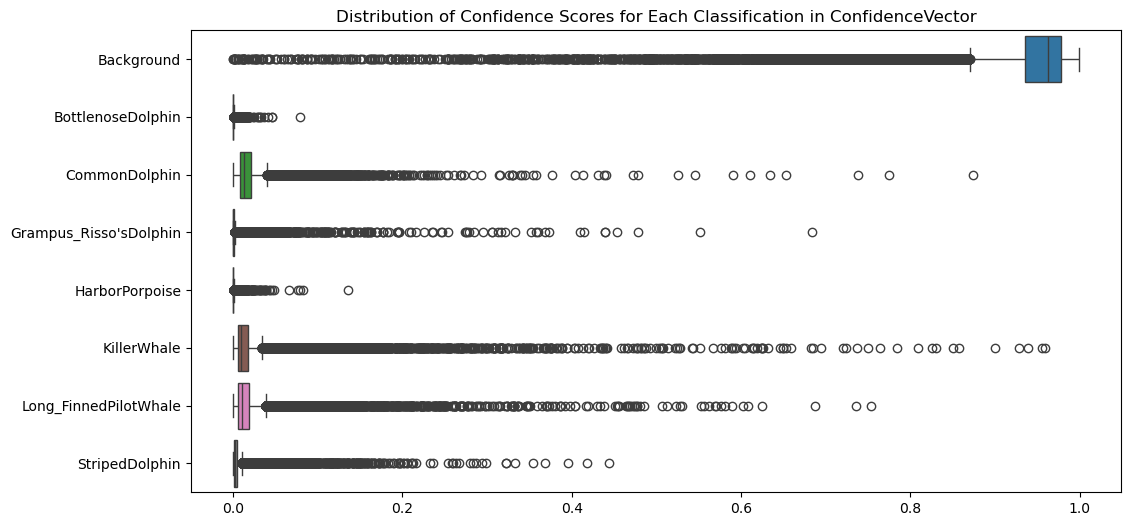

In [12]:
# Check the distribution of the confidence scores for each classification in ConfidenceVector
confidence_vector = df['ConfidenceVector'].apply(eval)
confidence_vector = pd.DataFrame(confidence_vector.tolist(), columns=CLASSES_MAPPING.keys())

plt.figure(figsize=(12, 6))
sns.boxplot(data=confidence_vector, orient='h')
plt.title('Distribution of Confidence Scores for Each Classification in ConfidenceVector')
plt.show()

In [13]:
# Load predictions file
# predictions_file = "predictions.csv"  # Replace with your actual file path
# predictions_df = pd.read_csv(predictions_file)

# Reverse mapping for easy lookup
IDX_TO_CLASSES = {v: k for k, v in CLASSES_MAPPING.items()}

In [14]:
def analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.5):
    results = []

    for _, row in df.iterrows():
        confidence_vector = eval(row['ConfidenceVector'])  # Convert string to list
        main_class_idx = np.argmax(confidence_vector)
        main_class_score = confidence_vector[main_class_idx]

        # Sort classes by confidence
        sorted_classes = sorted(
            enumerate(confidence_vector), key=lambda x: x[1], reverse=True
        )

        # Filter background if necessary
        if ignore_background:
            sorted_classes = [sc for sc in sorted_classes if sc[0] != CLASSES_MAPPING['Background']]

        # Filter by confidence threshold
        sorted_classes = [sc for sc in sorted_classes if sc[1] >= confidence_threshold]

        # Create a summary for this row
        summary = {
            'Filename': row['Filename'],
            'StartSecond': row['StartSecond'],
            'EndSecond': row['EndSecond'],
            'MainClassification': IDX_TO_CLASSES[main_class_idx],
            'MainConfidenceScore': main_class_score,
            'TopClasses': [
                {
                    'Class': IDX_TO_CLASSES[class_idx],
                    'Score': score
                }
                for class_idx, score in sorted_classes[:5]  # Top 5 classifications
            ]
        }
        results.append(summary)

    return results

# Analyze with and without background, using a confidence threshold of 0.5
results_with_background = analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.3)
results_without_background = analyze_confidence_vectors(df, ignore_background=True, confidence_threshold=0.3)

Plotting results with background:


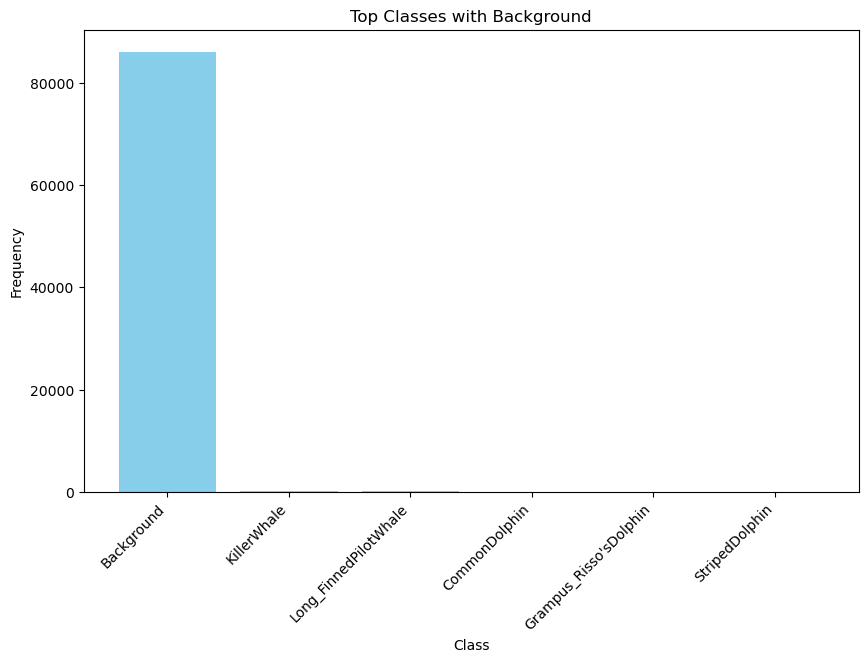


Plotting results without background:


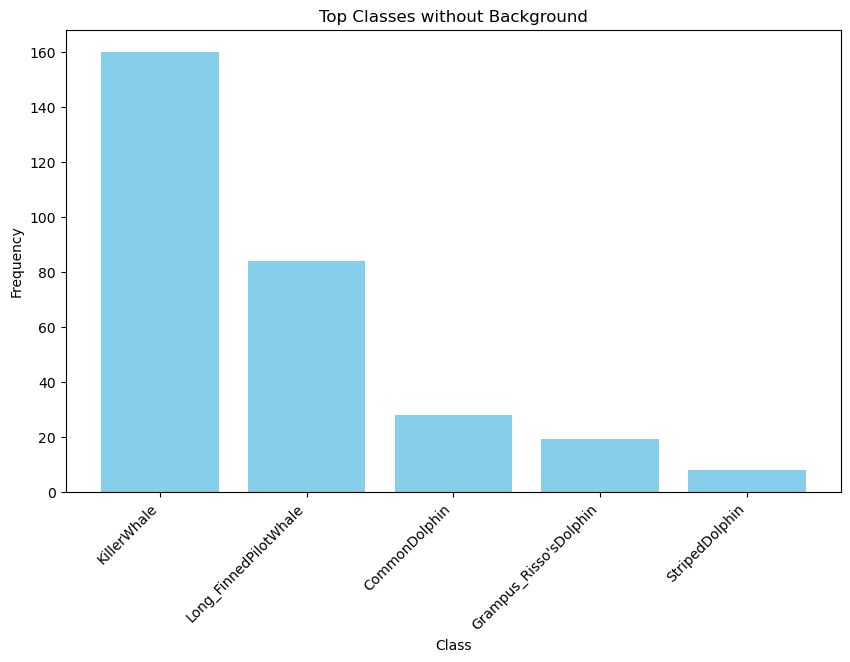

In [15]:
# Visualization function
def plot_top_classes(results, title):
    class_counts = {}

    for result in results:
        for entry in result['TopClasses']:
            class_name = entry['Class']
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Sort by frequency
    sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    classes, counts = zip(*sorted_counts)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot results
print("Plotting results with background:")
plot_top_classes(results_with_background, "Top Classes with Background")

print("\nPlotting results without background:")
plot_top_classes(results_without_background, "Top Classes without Background")

In [16]:
# save new csv without rows with background
df = df[df['MainClassification'] != 'Background']
df["Path"] = df["Path"].str.split("/mnt/e/").str[1]
df.to_csv('../../../../../mnt/e/22_WOPAM_DAY/predictions_no_background.csv', index=False)

/tmp/ipykernel_1794491/2619127949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Path"] = df["Path"].str.split("/mnt/e/").str[1]


In [17]:
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
2473,WOPAM DAY/channelA_2024-06-07_02-04-19_48kHz.wav,channelA_2024-06-07_02-04-19_48kHz.wav,153,156,Long_FinnedPilotWhale,0.369983,"[0.14159300923347473, 0.0019914598669856787, 0..."
2487,WOPAM DAY/channelA_2024-06-07_02-04-19_48kHz.wav,channelA_2024-06-07_02-04-19_48kHz.wav,195,198,Long_FinnedPilotWhale,0.480782,"[0.07694968581199646, 0.002788068260997534, 0...."
6730,WOPAM DAY/channelA_2024-06-07_05-37-48_48kHz.wav,channelA_2024-06-07_05-37-48_48kHz.wav,114,117,KillerWhale,0.508355,"[0.3596051335334778, 0.00015596894081681967, 0..."
7182,WOPAM DAY/channelA_2024-06-07_05-59-39_48kHz.wav,channelA_2024-06-07_05-59-39_48kHz.wav,159,162,Long_FinnedPilotWhale,0.313850,"[0.2922241687774658, 0.003961332142353058, 0.0..."
7199,WOPAM DAY/channelA_2024-06-07_05-59-39_48kHz.wav,channelA_2024-06-07_05-59-39_48kHz.wav,210,213,Long_FinnedPilotWhale,0.328457,"[0.276525616645813, 0.00995889212936163, 0.201..."
...,...,...,...,...,...,...,...
84009,WOPAM DAY/channelA_2024-06-09_22-00-47_48kHz.wav,channelA_2024-06-09_22-00-47_48kHz.wav,204,207,KillerWhale,0.484984,"[0.40994518995285034, 0.0006423370214179158, 0..."
84011,WOPAM DAY/channelA_2024-06-09_22-00-47_48kHz.wav,channelA_2024-06-09_22-00-47_48kHz.wav,210,213,KillerWhale,0.623691,"[0.27460262179374695, 0.0024500610306859016, 0..."
84014,WOPAM DAY/channelA_2024-06-09_22-00-47_48kHz.wav,channelA_2024-06-09_22-00-47_48kHz.wav,219,222,KillerWhale,0.650030,"[0.1385616958141327, 0.003968500532209873, 0.0..."
84016,WOPAM DAY/channelA_2024-06-09_22-00-47_48kHz.wav,channelA_2024-06-09_22-00-47_48kHz.wav,225,228,KillerWhale,0.649783,"[0.21540988981723785, 0.003877537790685892, 0...."


In [18]:
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
2473,WOPAM DAY/channelA_2024-06-07_02-04-19_48kHz.wav,channelA_2024-06-07_02-04-19_48kHz.wav,153,156,Long_FinnedPilotWhale,0.369983,"[0.14159300923347473, 0.0019914598669856787, 0..."
2487,WOPAM DAY/channelA_2024-06-07_02-04-19_48kHz.wav,channelA_2024-06-07_02-04-19_48kHz.wav,195,198,Long_FinnedPilotWhale,0.480782,"[0.07694968581199646, 0.002788068260997534, 0...."
6730,WOPAM DAY/channelA_2024-06-07_05-37-48_48kHz.wav,channelA_2024-06-07_05-37-48_48kHz.wav,114,117,KillerWhale,0.508355,"[0.3596051335334778, 0.00015596894081681967, 0..."
7182,WOPAM DAY/channelA_2024-06-07_05-59-39_48kHz.wav,channelA_2024-06-07_05-59-39_48kHz.wav,159,162,Long_FinnedPilotWhale,0.313850,"[0.2922241687774658, 0.003961332142353058, 0.0..."
7199,WOPAM DAY/channelA_2024-06-07_05-59-39_48kHz.wav,channelA_2024-06-07_05-59-39_48kHz.wav,210,213,Long_FinnedPilotWhale,0.328457,"[0.276525616645813, 0.00995889212936163, 0.201..."
...,...,...,...,...,...,...,...
84009,WOPAM DAY/channelA_2024-06-09_22-00-47_48kHz.wav,channelA_2024-06-09_22-00-47_48kHz.wav,204,207,KillerWhale,0.484984,"[0.40994518995285034, 0.0006423370214179158, 0..."
84011,WOPAM DAY/channelA_2024-06-09_22-00-47_48kHz.wav,channelA_2024-06-09_22-00-47_48kHz.wav,210,213,KillerWhale,0.623691,"[0.27460262179374695, 0.0024500610306859016, 0..."
84014,WOPAM DAY/channelA_2024-06-09_22-00-47_48kHz.wav,channelA_2024-06-09_22-00-47_48kHz.wav,219,222,KillerWhale,0.650030,"[0.1385616958141327, 0.003968500532209873, 0.0..."
84016,WOPAM DAY/channelA_2024-06-09_22-00-47_48kHz.wav,channelA_2024-06-09_22-00-47_48kHz.wav,225,228,KillerWhale,0.649783,"[0.21540988981723785, 0.003877537790685892, 0...."
